In [6]:
import os
os.chdir("/home/saurabh/magus/projects/faster_rcnn/darkflow")

In [12]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

In [8]:
# define the model options and run

options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo-new.weights',
    'threshold': 0.3,
    'gpu': 1.0
}

tfnet = TFNet(options)

/home/saurabh/magus/projects/faster_rcnn/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolo-new.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolo-new.weights ...
Successfully identified 203934260 bytes
Finished in 0.011410236358642578s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  

In [15]:
img = cv2.imread('./sample_img/sample_person.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(img)
results

[{'bottomright': {'x': 271, 'y': 375},
  'confidence': 0.8331292,
  'label': 'person',
  'topleft': {'x': 187, 'y': 103}},
 {'bottomright': {'x': 205, 'y': 354},
  'confidence': 0.8508314,
  'label': 'dog',
  'topleft': {'x': 69, 'y': 259}},
 {'bottomright': {'x': 606, 'y': 352},
  'confidence': 0.8790006,
  'label': 'horse',
  'topleft': {'x': 397, 'y': 127}}]

In [16]:
colors = [tuple(255 * np.random.rand(3)) for i in range(5)]
for color, result in zip(colors, results):
    tl = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    img = cv2.rectangle(img, tl, br, color, 4)
    img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)

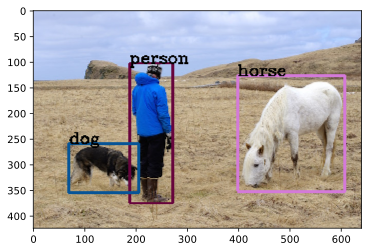

In [17]:
plt.imshow(img)
plt.show()

In [18]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('result1.png',img)

True